In [22]:
import numpy as np 
import pandas as pd

In [23]:
data=pd.read_csv("FuelEfficiency.csv")
data.head()

,Mfr Name,Carline,Eng Displ,Cylinders,Transmission,CityMPG,HwyMPG,CombMPG,# Gears
0,aston martin,Vantage V8,4.0,8,Auto(S8),18,25,21,8
1,Volkswagen Group of,Chiron,8.0,16,Auto(AM-S7),9,14,11,7
2,General Motors,CORVETTE,6.2,8,Auto(S8),12,20,15,8
3,General Motors,CORVETTE,6.2,8,Auto(S8),15,25,18,8
4,General Motors,CORVETTE,6.2,8,Auto(S8),14,23,17,8


In [24]:
data.describe()

,Eng Displ,Cylinders,CityMPG,HwyMPG,CombMPG,# Gears
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,3.092061,5.493036,20.442897,27.760446,23.139276,7.147632
std,1.344572,1.752251,5.298504,5.607924,5.368443,1.507929
min,1.400000,3.000000,9.000000,14.000000,11.000000,1.000000
25%,2.000000,4.000000,17.000000,24.000000,19.000000,6.000000
50%,3.000000,6.000000,20.000000,27.000000,23.000000,7.000000
75%,3.600000,6.000000,23.000000,31.000000,26.000000,8.000000
max,8.000000,16.000000,57.000000,59.000000,58.000000,10.000000


In [25]:
meanMPG=data['CombMPG'].mean()
data['FuelEfficient']=(data['CombMPG']>meanMPG).astype(int)

In [26]:
data['FuelEfficient'].head()

0    0
1    0
2    0
3    0
4    0
Name: FuelEfficient, dtype: int32

In [27]:
all_labels = set()
for labels_str in data['Transmission']:
    labels1 = labels_str.split('(')[0]
    data['TransClass']=labels1
    all_labels.add(labels1)
print(all_labels)
    


{'Manual', 'Auto'}


In [28]:
d1={'Manual':0,'Auto':1}
data['TransClass']=data['TransClass'].map(d1)


In [29]:
Ed_bins=np.arange(1,11,2)
Ed_bins_labels=list(range(len(Ed_bins)-1))
data['EngDisp_bins']=pd.cut(data['Eng Displ'],bins=Ed_bins,labels=Ed_bins_labels,right=False)

In [30]:
Cylin_bins=np.arange(0,24,4)
Cylin_bins_labels=list(range(len(Cylin_bins)-1))
data['Cylin_bins']=pd.cut(data['Cylinders'],
                          bins=Cylin_bins,labels=Cylin_bins_labels,right=False)

In [31]:
Gear_bins=np.arange(0,15,3)
Gear_bins_labels=list(range(len(Gear_bins)-1))
data['Gear_bins']=pd.cut(data['# Gears'],bins=Gear_bins,labels=Gear_bins_labels,right=False)

In [32]:
category_cols=['Gear_bins','EngDisp_bins','Cylin_bins']
data[category_cols]=data[category_cols].astype(int)
#print(data.dtypes)

In [33]:
features=['Gear_bins','EngDisp_bins','Cylin_bins','TransClass']
X=np.array(data[features])
y=np.array(data['FuelEfficient'])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn import tree


In [35]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [36]:
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import tree

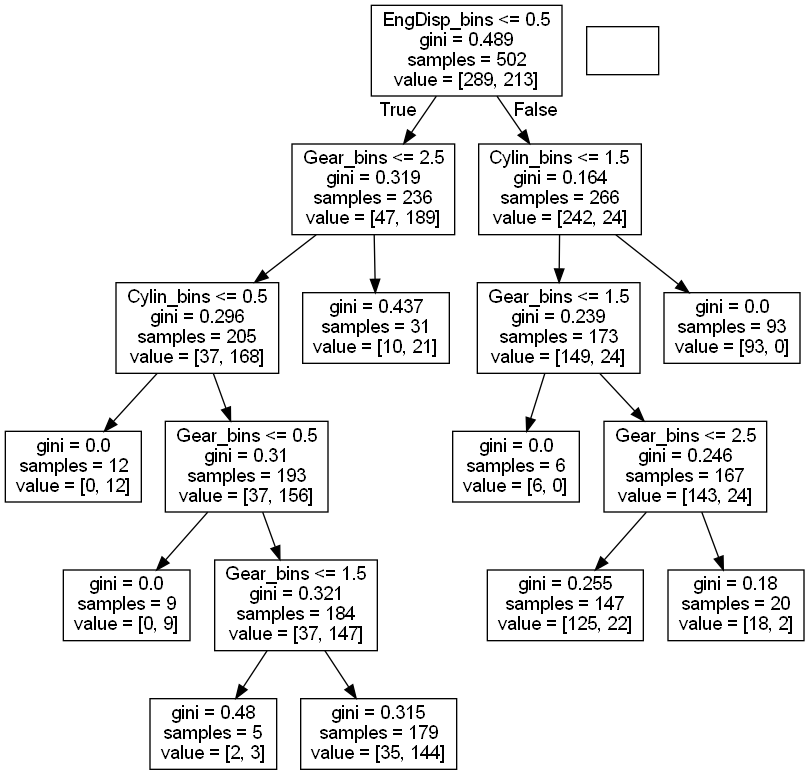

In [37]:
dot_data = StringIO()
tree.export_graphviz(clf,out_file=dot_data,feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [38]:
from sklearn.metrics import accuracy_score


In [39]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8703703703703703

In [40]:
print(y_pred)
print(y_test)

[0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0
 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1
 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1
 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0]
[1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1
 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1
 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1
 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 1
 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0]


In [41]:
filename='DecisionTreePrediction.csv'
pred_act_df=pd.DataFrame()
pred_act_df['Predicted Value']=y_pred
pred_act_df['Actual Value']=y_test
pred_act_df.to_csv(filename,index=False)
